In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils
import xml.etree.ElementTree as ET


#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="consolas")
plt.rcParams["font.family"]="consolas" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="consolas", 
        rc={"axes.unicode_minus":False},style='darkgrid')


C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4818327099118513476
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12475548090354566136
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18340448853346922460
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9389783758801802836
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [2]:
import random 
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

%cd C:\Users\yukir\Documents\Monicas_workspace\Knee

C:\Users\yukir\Documents\Monicas_workspace\Knee


In [3]:
def show(img):
    #사이즈
    plt.figure(figsize = (6,6))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(6,6))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

#### MODEL_LOAD

In [4]:
from tensorflow.keras.models import load_model
model = load_model('C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\unet\\[0110]knee_annotation.h5')

#### IMG_LOADER

In [132]:
# img_loader
#Test Image
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 1

IMG_PATH = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\4\\'
img_list = []
file_name =[]
for i in os.listdir(IMG_PATH):
    adr = IMG_PATH+i
    # print(adr)
    img_list.append(IMG_PATH+i)
    file_name.append(i)

print(len(img_list))


295


In [133]:
# img_loader
#Test Image

X_test = np.zeros((len(img_list),224,224), dtype= np.uint8)

sizes_test = []
for n, id_ in tqdm(enumerate(img_list)):
    img_ = imread(id_)
    # show(img)
    hist, bins = np.histogram(img_.flatten(), 256,[0,256])

    cdf = hist.cumsum()

    # cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
    # mask처리가 되면 Numpy 계산에서 제외가 됨
    # 아래는 cdf array에서 값이 0인 부분을 mask처리함
    cdf_m = np.ma.masked_equal(cdf,0)

    #History Equalization 공식
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

    # Mask처리를 했던 부분을 다시 0으로 변환
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    img = cdf[img_]
    # print(img.shape)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT,IMG_WIDTH), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('Done')

295it [00:02, 144.34it/s]

Done


In [134]:
preds_test = model.predict(X_test, verbose =1)
preds_test_t = (preds_test>0.5).astype(np.uint8)

10/10 [==============================] - 0s 35ms/step


In [135]:
for i in tqdm (range (len(preds_test_t))):
    img_1 = imread(img_list[i])
    img_2 = X_test[i]
    img_3 = np.squeeze(preds_test_t[i])

    img_name = file_name[i].split('.jpg')[0]

    #저장
    save_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\mask_dataset\\4\\'
    img = cv2.convertScaleAbs(img_3, alpha=(255.0)) # 이거없으면 all black 으로 저장됨 
    cv2.imwrite(save_path+img_name+'_mask.jpg', img)

    # print(len(preds_test_t)-i, '--------', file_name[i])
    # show(preds_test_t[i])
    # f, ax = plt.subplots(1, 3, figsize=(8,8))
    # ax[0].imshow(img_1,cmap = 'gray')
    # ax[1].imshow(img_2,cmap = 'gray')
    # ax[2].imshow(img_3,cmap = 'gray')
    # ax[0].axis('off') #hide the axis
    # ax[1].axis('off')
    # ax[2].axis('off')
    # f.tight_layout()
    # plt.show()

100%|██████████| 295/295 [00:01<00:00, 240.81it/s]


### MAKE csv

In [174]:
org_list=[]
mask_list=[]
grade_list=[]

In [175]:
knee_0_org = os.listdir('C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\0\\')
knee_0_mask = os.listdir('C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\mask_dataset\\0\\')
for i in knee_0_org:
    org_list.append(i)

for k in knee_0_mask:
    mask_list.append(k)

for i in tqdm (range(len(knee_0_mask))):
    grade_list.append('0')
    
print(len(org_list))
print(len(mask_list))
print(len(grade_list))

100%|██████████| 3857/3857 [00:00<00:00, 3855441.02it/s]

3857
3857
3857


In [179]:
knee_org = os.listdir('C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\4\\')
knee_mask = os.listdir('C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\mask_dataset\\4\\')
for i in knee_org:
    org_list.append(i)

for k in knee_mask:
    mask_list.append(k)

for i in tqdm (range(len(knee_mask))):
    grade_list.append('4')
    
print(len(org_list))
print(len(mask_list))
print(len(grade_list))

100%|██████████| 295/295 [00:00<?, ?it/s]

9786
9786
9786


In [180]:
data_info = pd.DataFrame({'org_file':org_list, 'mask_file':mask_list, 'grade':grade_list})
data_info.head()

data_info.to_excel('arth_data.xlsx', encoding='utf-8')

#### DATA SPLIT

In [181]:
data_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\'
list_file = get_file_list(data_path)
list_file

['C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\0',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\1',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\2',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\3',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\4']

In [182]:
categories = ['0','1','2','3','4']

In [183]:
def data_for_ml (categories, data_path, num):
    data = []
    img_path=[]
    

    for category in categories:
        file_path = os.path.join(data_path, category)
        print(file_path)
        label = categories.index(category)

        for img in os.listdir(file_path):
            imgpath = os.path.join(file_path, img)
            img_path.append(imgpath)

            try: 
                pet_img = cv2.imread(imgpath, cv2.IMREAD_COLOR)
                # pet_img = cv2.cvtColor(pet_img, cv2.COLOR_BGR2RGB)
                pet_img = cv2.resize(pet_img, (num, num))

                images = np.array(pet_img).flatten()

                data.append([images, label])

            except Exception as e:
                pass

    print('data수: ', len(data))
    return data, img_path, label

In [184]:
data, img_path, label = data_for_ml(categories, data_path, 224)

C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\0
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\1
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\2
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\3
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4
data수:  9786


In [185]:
features, labels = feature_label_maker(data)

features:  9786
features ex:  [89 89 89 ... 80 80 80]
feature shape:  (150528,)
-----------------------------
labels:  9786
labels ex:  0
labels shape:  (150528,)


In [186]:
print(len(img_path))
print(len(labels))
print(len(features))

9786
9786
9786


In [187]:
feature_names = []
for num, i in enumerate (img_path):
    i = i.split('/')[-1]
    feature_names.append(i)
    
feature_names[2]

'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\knee_dataset_org\\0\\0_9003126L.jpg'

In [188]:
for i in categories:
    img_paths = data_path+i
    print(i, count_img(img_paths))

이미지 수 3857
0 None
이미지 수 1770
1 None
이미지 수 2578
2 None
이미지 수 1286
3 None
이미지 수 295
4 None


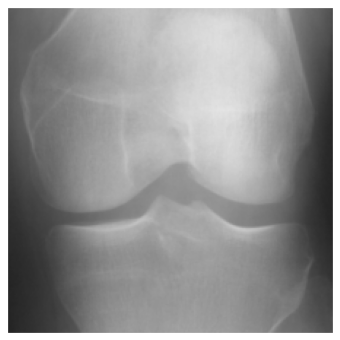

0


In [189]:
for_test = features[0]
for_test_img = for_test.reshape(224,224,3)
show(for_test_img)
print(categories[labels[3]])

In [190]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold

In [191]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)

skf.get_n_splits(features, labels)
print(skf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


#### validation용 dataset

In [192]:
train_index, test_index = next(skf.split(features, labels))
train_X, test_X = features[train_index], features[test_index]
train_y, test_y = labels[train_index], labels[test_index]

print(len(test_X))
print(len(test_X))

1958
1958


In [193]:
val_img_list = []
for i in test_index:
    val_img_list.append(img_path[i])

In [194]:
knee_0 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\val\\0"
knee_1 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\val\\1"
knee_2 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\val\\2"
knee_3 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\val\\3"
knee_4 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\val\\4"

In [195]:
import shutil
import os


for i in val_img_list:
    try:
        if '0_' in i:
            shutil.copy(i, knee_0)
        elif '1_' in i:
            shutil.copy(i, knee_1)
        elif '2_' in i:
            shutil.copy(i, knee_2)
        elif '3_' in i:
            shutil.copy(i, knee_3)
        elif '4_' in i:
            shutil.copy(i, knee_4)
    except:
        print(i)

#### train, test용 dataset

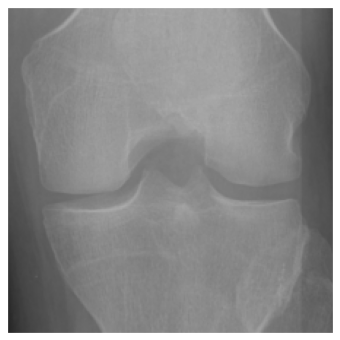

In [196]:
test_index =test_index.tolist()
img_path[0]
jpg = test_X[0].reshape(224,224,3)
show(jpg)

In [198]:
#새로운 파일명 만들기 --> feature되야함

new_img_path =[]
for num, i in enumerate(features):
    if num in test_index:
#         print(test_index[num])
        pass
    else:
        new_img_path.append(img_path[num])
        
print(len(new_img_path))

7828


In [199]:
new_features=[]
for num, i in enumerate (features):
    if num in test_index:
        pass
    else:
        new_features.append(i)

In [200]:
new_label = []
for num, i in enumerate (labels):
    if num in test_index:
        pass
    else:
        new_label.append(i)

In [201]:
new_features = np.array(new_features)
new_label = np.array(new_label)

In [202]:
#train_test

train_index1, test_index1 = next(skf.split(new_features, new_label))
X_train, X_test = new_features[train_index1], new_features[test_index1]
y_train, y_test = new_label[train_index1], new_label[test_index1]

In [207]:
train_img_list = []
for i in train_index1:
    train_img_list.append(new_img_path[i])

    
test_img_list = []
for i in test_index1:
    test_img_list.append(new_img_path[i])

In [208]:
# train
 
knee_0 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\train\\0"
knee_1 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\train\\1"
knee_2 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\train\\2"
knee_3 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\train\\3"
knee_4 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\train\\4"

In [209]:
for i in tqdm(train_img_list):
    try:
        if '0_' in i:
            shutil.copy(i, knee_0)
        elif '1_' in i:
            shutil.copy(i, knee_1)
        elif '2_' in i:
            shutil.copy(i, knee_2)
        elif '3_' in i:
            shutil.copy(i, knee_3)
        elif '4_' in i:
            shutil.copy(i, knee_4)
    except:
        print(i)

100%|██████████| 6262/6262 [00:08<00:00, 722.33it/s]


In [210]:
# test
 
knee_0 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\test\\0"
knee_1 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\test\\1"
knee_2 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\test\\2"
knee_3 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\test\\3"
knee_4 ="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\teset\\4"

In [211]:
for i in tqdm(test_img_list):
    try:
        if '0_' in i:
            shutil.copy(i, knee_0)
        elif '1_' in i:
            shutil.copy(i, knee_1)
        elif '2_' in i:
            shutil.copy(i, knee_2)
        elif '3_' in i:
            shutil.copy(i, knee_3)
        elif '4_' in i:
            shutil.copy(i, knee_4)
    except:
        print(i)

100%|██████████| 1566/1566 [00:02<00:00, 761.60it/s]

C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9012867R.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9025994L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9069393L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9114036R.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9144384R.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9173013L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9197466L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9218935R.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9230284L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9254422L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9303539L.jpg
C:\Users\yukir\Documents\Monicas_workspace\Knee\knee_dataset_org\4\4_9351700R.jpg
C:\Users\yukir\D

#### masked data move

In [104]:
path = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\org\\val\\4\\"
file_name = os.listdir(path)
print(file_name[:3])
print(len(file_name))

['4_9048789L.jpg', '4_9081306L.jpg', '4_9101066_1.jpg']
36


In [105]:
mask_path = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\mask_dataset\\4"
mask_file = os.listdir(mask_path)

mask_list=[]

for i in mask_file:
    name = i.split('_mask')[0]
    mask_list.append(name)

print(len(mask_list))

295


In [106]:
save_path = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\Knee\\vgg_dataset\\mask\\val\\4\\"

for num, i in tqdm(enumerate(file_name)):
    img_name = i.split('.jpg')[0]
    # print(img_name)
    if img_name in mask_list:
        # print(save_path+i)
        shutil.copy2(path+i, save_path+img_name+'_masked.jpg')

36it [00:00, 210.53it/s]
